# Stable Marriage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## "Stable Marriage" is a setting, in which while one does not necessarily gets their first preference, at least nobody has an incentive to swap a partner, and hence none of the couples "break".

* For simplicity, in the story below, a marriage is between a man and a woman.

In [2]:
# We have the same number of men and women.

num_men = num_women = 20

In [3]:
# To create the preferences (for a specific man, what his preference regarding all the women), etc.
# We can try to create a random permutation of the women, per man, and then the other way around.
# Here we'll do it with just selecting randomly a number between 0 and 1, and we'll use this number for ordering.

men_preferences = np.random.rand(num_men, num_women) # rows - men, cols - women
women_preferences = np.random.rand(num_women, num_men) # rows women, cols - men

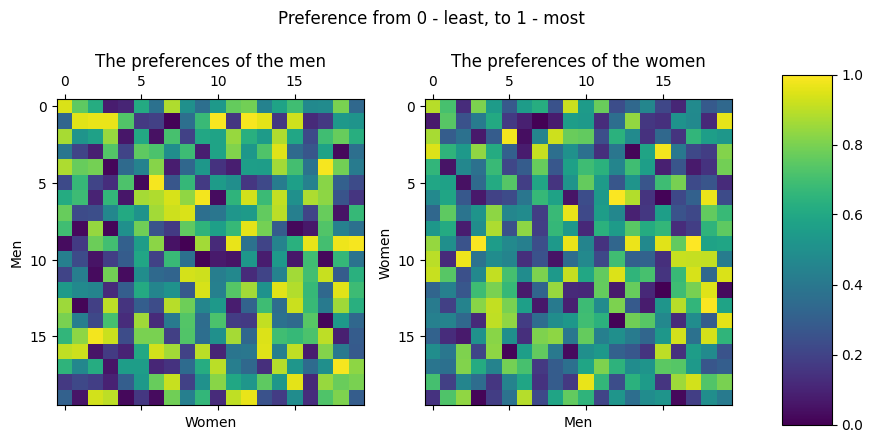

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

im = axs[0].matshow(men_preferences, vmin=0, vmax=1)
axs[0].set_title('The preferences of the men')
axs[0].set_ylabel('Men')
axs[0].set_xlabel('Women')

axs[1].matshow(women_preferences, vmin=0, vmax=1)
axs[1].set_title('The preferences of the women')
axs[1].set_ylabel('Women')
axs[1].set_xlabel('Men')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.suptitle("Preference from 0 - least, to 1 - most")

plt.show()

## From the random number above, we can get to an ordering based on the preference.

In [5]:
x = men_preferences.argsort(axis=1)

## It will be nice next to have it as a list, so that we can "pop" a potential suitheart on each iteration.

In [6]:
type(x[0])

numpy.ndarray

In [7]:
[list(row) for row in x]

[[3, 4, 19, 9, 6, 13, 16, 17, 8, 10, 14, 5, 2, 15, 1, 11, 12, 18, 7, 0],
 [7, 16, 14, 11, 17, 5, 6, 0, 8, 19, 18, 9, 4, 15, 1, 13, 2, 3, 12, 10],
 [6, 4, 8, 16, 1, 13, 2, 10, 15, 9, 5, 19, 12, 17, 7, 18, 11, 3, 0, 14],
 [18, 9, 2, 1, 4, 16, 15, 19, 0, 7, 12, 17, 10, 8, 6, 13, 3, 5, 11, 14],
 [3, 7, 11, 10, 8, 4, 16, 19, 5, 9, 13, 12, 15, 1, 18, 2, 6, 14, 0, 17],
 [5, 3, 12, 9, 2, 13, 0, 19, 7, 18, 14, 16, 11, 10, 15, 8, 1, 4, 17, 6],
 [10, 4, 2, 19, 18, 15, 0, 11, 3, 13, 1, 17, 8, 5, 16, 6, 14, 12, 7, 9],
 [18, 16, 1, 2, 9, 10, 15, 3, 5, 11, 12, 4, 19, 13, 17, 0, 6, 14, 7, 8],
 [3, 15, 1, 16, 7, 6, 14, 19, 18, 4, 10, 9, 11, 0, 17, 8, 5, 13, 2, 12],
 [8, 0, 7, 10, 1, 13, 4, 12, 14, 5, 15, 3, 17, 2, 6, 9, 11, 16, 18, 19],
 [9, 17, 2, 11, 15, 10, 13, 3, 6, 1, 4, 8, 19, 0, 12, 14, 5, 18, 7, 16],
 [2, 4, 12, 13, 0, 18, 7, 6, 10, 1, 14, 11, 5, 19, 16, 3, 15, 17, 9, 8],
 [3, 8, 4, 17, 10, 2, 6, 1, 7, 13, 0, 5, 16, 19, 11, 12, 15, 9, 14, 18],
 [1, 11, 4, 2, 6, 5, 12, 14, 17, 9, 10, 19, 16, 13,

## We know of a simple algorithm that solves this problem. It goes as follows:
- A man that is not currently engaged, offers a marriage to a woman that he prefers the most.
- If the woman is not engaged yet, or the woman is engaged yet she prefers the new suiter, than she accepts.
- A man that used to be engaged yet is now a single again, returns to the pool of unengaged men.

In [8]:
def stable_marriage(men_preferences, women_preferences):
    num_men = len(men_preferences)
    num_women = len(women_preferences)

    assert num_men == num_women, f'{num_men=}, {num_women=}'
    
    temporary_couples = {} # key; man, value; woman
    men_options = {
        man: options[::-1] # reversing the order
        for man, options in enumerate(men_preferences.argsort(axis=1).tolist())
    }

    while len(temporary_couples) < num_men:
        men_with_no_match = list(set(range(num_men)) - set(temporary_couples.keys()))
        man = np.random.choice(men_with_no_match)
        woman = men_options[man].pop(0) # this is the current best option for 'man'
        # now propose
        # print(f'man {man} proposase to woman {woman}')
        couple = next((couple for couple in temporary_couples.items() if couple[1] == woman), (-1, -1))
        current_man = couple[0]
        if current_man == -1:
            # print(f'woman {woman} accepts proposal from man {man}') 
            temporary_couples[man] = woman
        else:
            if women_preferences[man, woman] > women_preferences[current_man, woman]:
                # print(f'woman {woman} accepts proposal from man {man}, but first dissapoints man {current_man}') 
                del temporary_couples[current_man]
                temporary_couples[man] = woman
            else:
                # print(f'woman {woman} rejects proposal from man {man}')
                pass

    assert len(temporary_couples) == num_men
    assert set(temporary_couples.keys()) == set(range(num_men))
    assert set(temporary_couples.values()) == set(range(num_women))
                    
    return temporary_couples

In [9]:
couples = stable_marriage(men_preferences, women_preferences)

In [10]:
edges = [((couple[0], 'man'), (couple[1], 'woman')) for couple in couples.items()]

In [11]:
g = nx.Graph(edges)

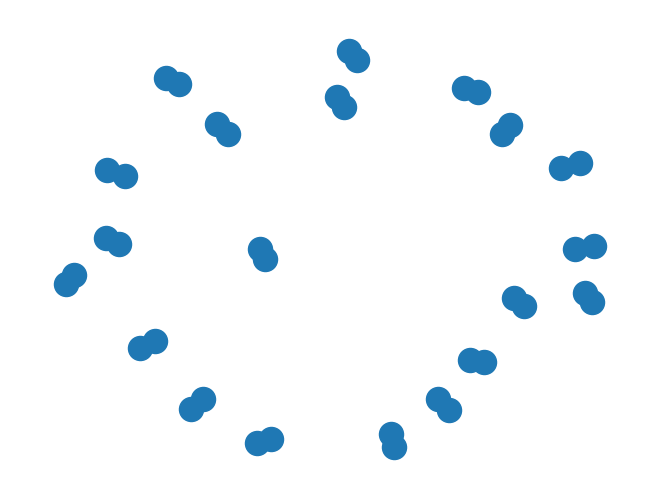

In [12]:
nx.draw(g)

## Let's improve the plot above..

In [13]:
pos = {
    node: (
        0 if node[1] == 'man' else 1,
        20 - node[0]
    )
    for node in g
}

In [14]:
color = ['red' if node[1] == 'man' else 'green' for node in g]

In [15]:
labels = {
    node: node[0]
    for node in g
}

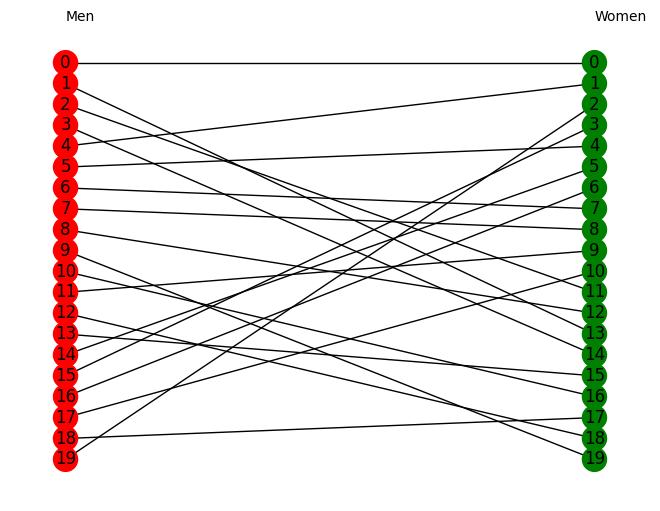

In [16]:
nx.draw(g, pos=pos, node_color=color, labels=labels)
plt.text(0, 22, 'Men')
plt.text(1, 22, 'Women')
plt.show()

In [17]:
from IPython.display import Audio
sound_file = "./sound/A_Midsummer_Night's_Dream_Op._61_Wedding_March_(Mendelssohn)_European_Archive.ogg"

In [18]:
# Uncomment and run on your own risk

# Audio(sound_file, autoplay=True)

## Let's compare the (histogram) of ranks for men preferences resulted in a marriage, and the ranks for the women's preferences. 

In [19]:
men_got_preference = []

for man, preference in enumerate(men_preferences.argsort(axis=1)):
    preference = preference[::-1]
    # print(preference)
    men_got_preference.append(np.where([preference == couples[man]])[1][0])

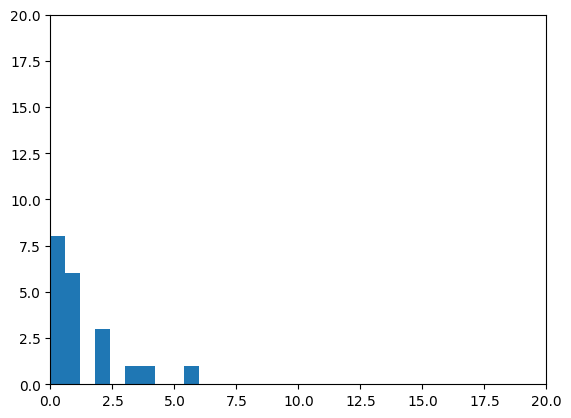

In [39]:
plt.hist(men_got_preference)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [21]:
np.mean(men_got_preference)

1.25

In [22]:
women_got_preference = []

for woman, preference in enumerate(women_preferences.argsort(axis=1)):
    preference = preference[::-1]
    # print(preference)
    couple = next((couple for couple in couples.items() if couple[1] == woman), (-1, -1))
    woman_got_preference = np.where([preference == couple[0]])
    women_got_preference.append(woman_got_preference[1][0])

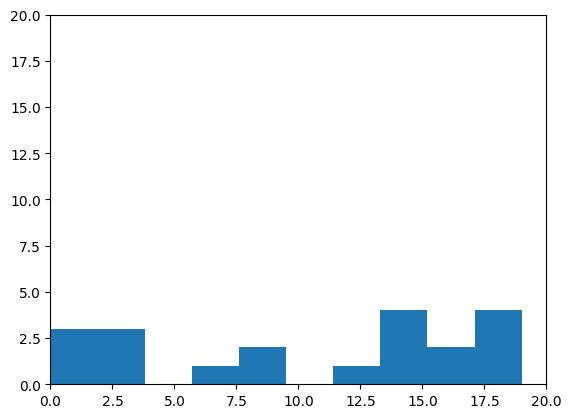

In [38]:
plt.hist(women_got_preference)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [24]:
np.mean(women_got_preference)

10.35

In [28]:
import seaborn as sns

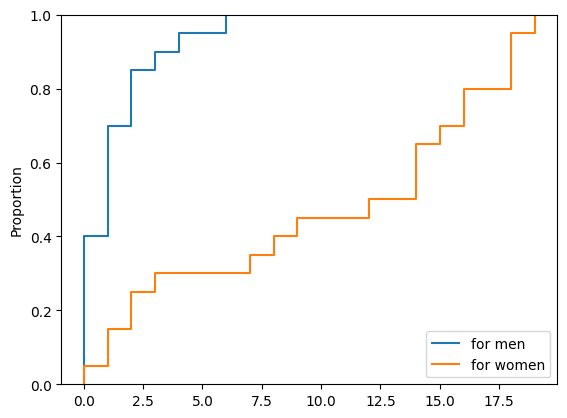

In [37]:
ax = sns.ecdfplot(men_got_preference, label="for men")
sns.ecdfplot(women_got_preference, label="for women", ax=ax)
plt.legend()
plt.show()

## It seems that if you are the proposer, you get a better preference of yours.